In [1]:
import pandas as pd
import numpy as np
import functionlib as fl
import matplotlib.pyplot as plt

In [34]:
def call_price(S0, K, T, r, vol, M=1000):
    """
    Simulate M scenarios and compute the payoff.
    The price of the European option is then computed by discounting the maximum payoff.
    """

    price_sim = fl.monte_carlo(S0, T, r, vol, M)
    final_prices = price_sim.iloc[-1]

    payoffs = np.maximum(final_prices-K,0)

    return np.exp(-r*T)*payoffs.mean()


In [50]:
#Parameters
S0 = 100
T = 1
r = 0.03
vol = 0.02
K = 100

c = lambda M: call_price(S0, K, T, r, vol, M)
M_range = np.linspace(1000,100000,50)

c_list = [c(int(M)) for M in M_range]



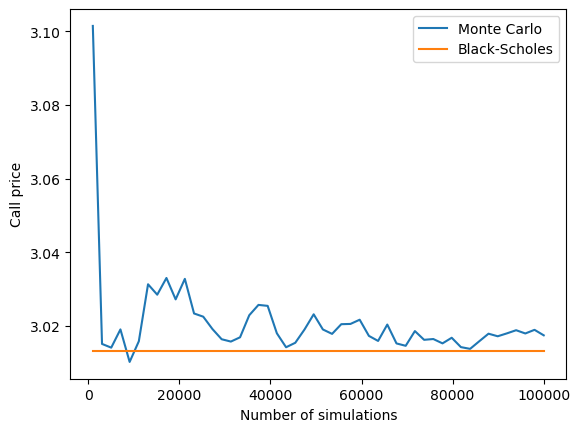

<Figure size 1000x500 with 0 Axes>

In [56]:
plt.plot(M_range, c_list)
call_bs = fl.black_scholes(S0, K, T, r, vol)
plt.plot(M_range, [call_bs]*50)
plt.xlabel('Number of simulations')
plt.ylabel('Call price')
plt.legend(['Monte Carlo', 'Black-Scholes'])
plt.figure(figsize=(10,5))
plt.show() 

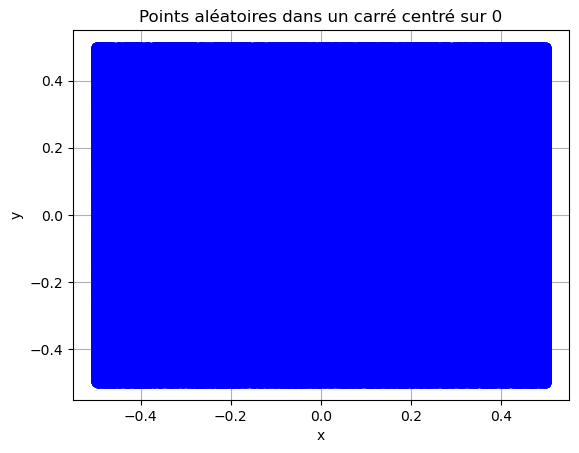

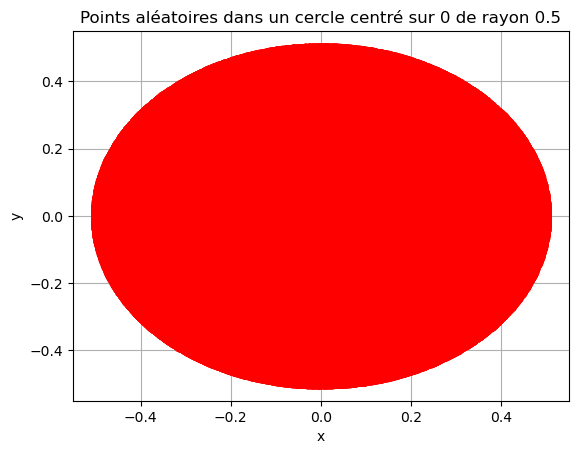

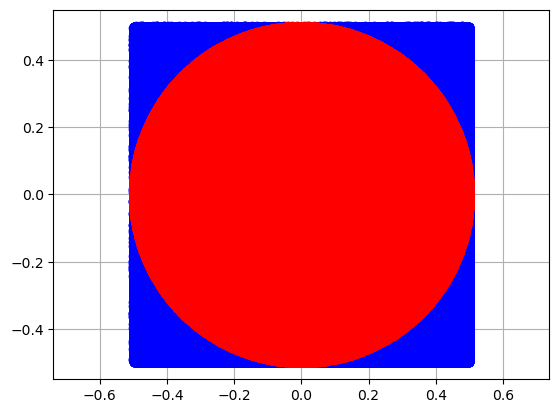

In [30]:
n = 1000000
points = np.random.uniform(-0.5, 0.5, size=(n, 2))
x = points[:,0]
y = points[:,1]


plt.plot(x, y, 'o', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Points aléatoires dans un carré centré sur 0')
plt.grid(True)
plt.show()


cercle = []

for i in range(n):
    if x[i]**2 + y[i]**2 <= 0.5**2:
        cercle.append(points[i].tolist())

cercle = np.array(cercle)
x_cercle = cercle[:,0]
y_cercle = cercle[:,1]

plt.plot(x_cercle, y_cercle, 'o', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Points aléatoires dans un cercle centré sur 0 de rayon 0.5')
plt.grid(True)
plt.show()


plt.plot(x, y, 'o', color='blue')
plt.plot(x_cercle, y_cercle, 'o', color='red')
plt.grid()
plt.axis('equal')
plt.show()

In [ ]:
n_cercle = len(cercle)
n_carre = len(points)

pi_estimate = n_cercle/n_carre
print(pi_estimate)

3.13998
